RFBOutputContext()

JupyterWgpuCanvas()
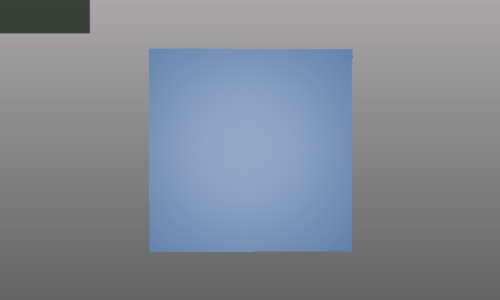

In [1]:
import pygfx as gfx
import pylinalg as la

cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)


def animate():
    rot = la.quat_from_euler((0.005, 0.01), order="XY")
    cube.local.rotation = la.quat_mul(rot, cube.local.rotation)

disp = gfx.Display()
disp.before_render = animate
disp.stats = True
disp.show(cube)

RFBOutputContext()

JupyterWgpuCanvas()
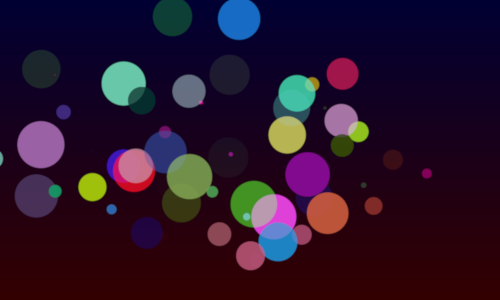

In [5]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas, run
import pygfx as gfx


canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)

scene = gfx.Scene()

positions = np.random.normal(0, 0.5, (100, 3)).astype(np.float32)
sizes = np.random.rand(100).astype(np.float32) * 50
colors = np.random.rand(100, 4).astype(np.float32)
geometry = gfx.Geometry(positions=positions, sizes=sizes, colors=colors)

material = gfx.PointsMaterial(color_mode="vertex", vertex_sizes=True)
points = gfx.Points(geometry, material)
scene.add(points)

scene.add(
    gfx.Background(None, gfx.BackgroundMaterial((0.2, 0.0, 0, 1), (0, 0.0, 0.2, 1)))
)

camera = gfx.NDCCamera()


canvas.request_draw(lambda: renderer.render(scene, camera))
run()

RFBOutputContext()

Imageio: 'astronaut.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/astronaut.png (773 kB)
Downloading: 8192/791555 bytes (1.0791555/791555 bytes (100.0%)
  Done
File saved as /Users/js0403/Library/Application Support/imageio/images/astronaut.png.


JupyterWgpuCanvas()
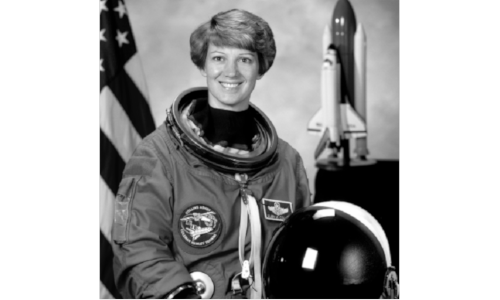

In [3]:
import imageio.v3 as iio
from wgpu.gui.auto import WgpuCanvas, run
import pygfx as gfx


canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)
scene = gfx.Scene()

im = iio.imread("imageio:astronaut.png")[:, :, 1]

image = gfx.Image(
    gfx.Geometry(grid=gfx.Texture(im, dim=2)),
    gfx.ImageBasicMaterial(clim=(0, 255)),
)
scene.add(image)

camera = gfx.OrthographicCamera(512, 512)
camera.local.position = (256, 256, 0)
camera.local.scale_y = -1


canvas.request_draw(lambda: renderer.render(scene, camera))
run()

RFBOutputContext()

JupyterWgpuCanvas()
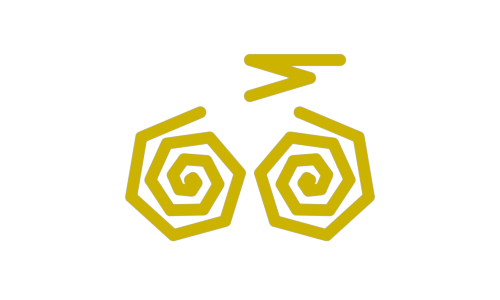

In [4]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas, run
import pygfx as gfx


canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)
renderer_svg = gfx.SvgRenderer(640, 480, "~/line.svg")

scene = gfx.Scene()
positions = [[200 + np.sin(i) * i * 6, 200 + np.cos(i) * i * 6, 0] for i in range(20)]
positions += [[np.nan, np.nan, np.nan]]
positions += [[400 - np.sin(i) * i * 6, 200 + np.cos(i) * i * 6, 0] for i in range(20)]
positions += [[np.nan, np.nan, np.nan]]
positions += [
    [450, 400, 0],
    [375, 400, 0],
    [300, 400, 0],
    [400, 370, 0],
    [300, 340, 0],
]

# Spiral away in z (to make the depth buffer less boring)
for i in range(len(positions)):
    positions[i][2] = i

line = gfx.Line(
    gfx.Geometry(positions=positions),
    gfx.LineMaterial(thickness=12.0, color=(0.8, 0.7, 0.0)),
)
scene.add(line)

camera = gfx.OrthographicCamera(600, 500)
camera.local.position = (300, 250, 0)

controller = gfx.PanZoomController(camera, register_events=renderer)


renderer_svg.render(scene, camera)
canvas.request_draw(lambda: renderer.render(scene, camera))
run()